<a href="https://colab.research.google.com/github/aruninimz/ML_Assignment2_IT19139418_IT19142692_-IT19127774_IT19033938/blob/main/Stock_Prediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import the libraries
import csv
import datetime
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
#connect to the google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Import data into  dataset object
dataSet = pd.read_csv('/content/drive/MyDrive/ML Assignment2/Tesla.csv - Tesla.csv.csv')
dataSet

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [5]:
#Drop unwanted  columns 
dataSet.drop('Adj Close' ,axis = 1 ,inplace = True) 

In [6]:
#check for the null values 
dataSet.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
import seaborn as sn # for data visualization

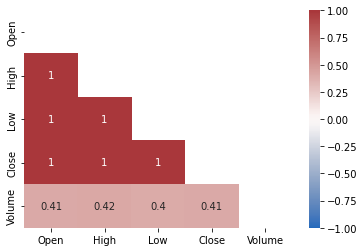

In [10]:
# create seaborn heatmap
matrix = dataSet.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sn.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

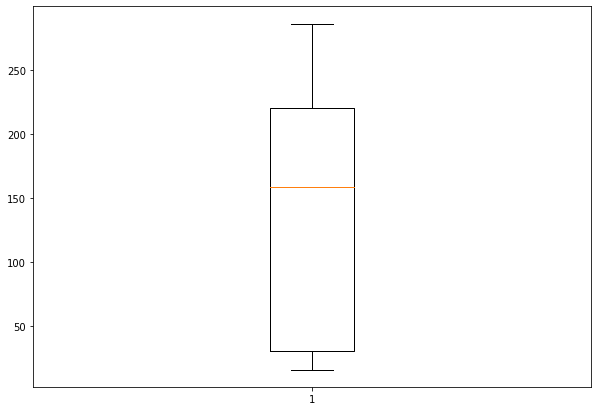

In [18]:

fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(dataSet['Close']) 

# show plot 
plt.show()

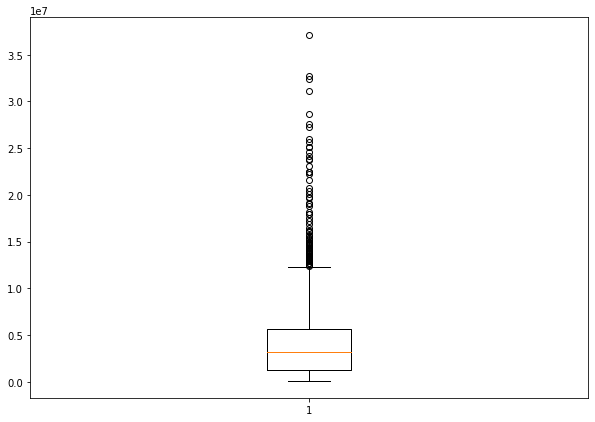

In [19]:

fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(dataSet['Volume']) 

# show plot 
plt.show()

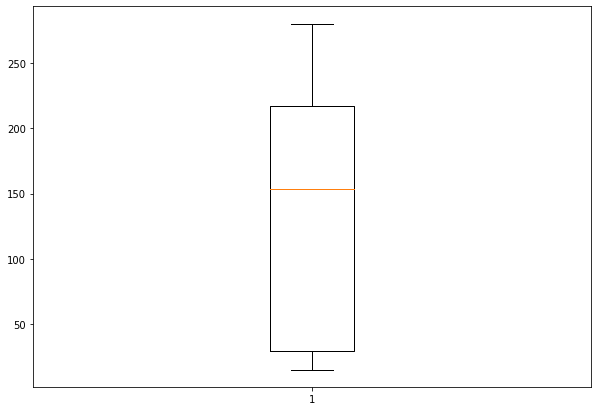

In [17]:

fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(dataSet['Low']) 

# show plot 
plt.show()

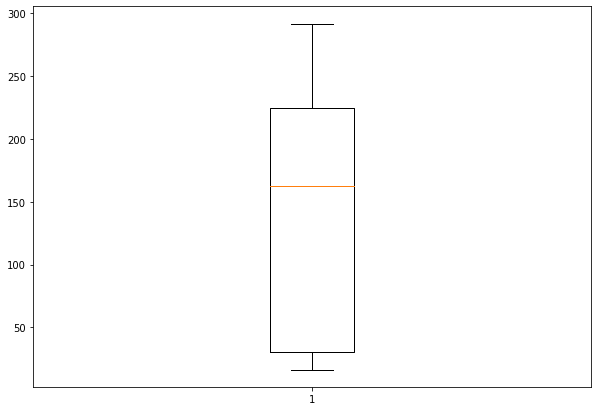

In [16]:

fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(dataSet['High']) 

# show plot 
plt.show()

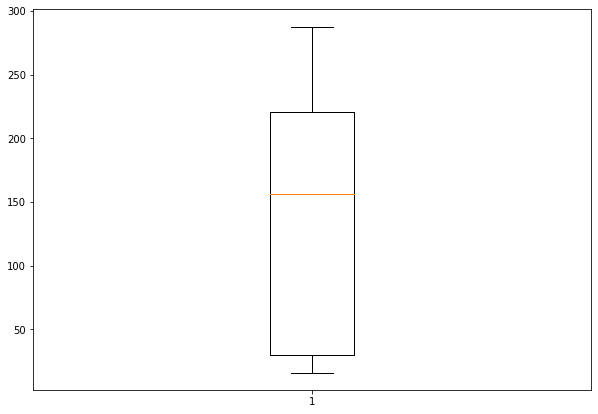

In [15]:


fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(dataSet['Open']) 

# show plot 
plt.show()

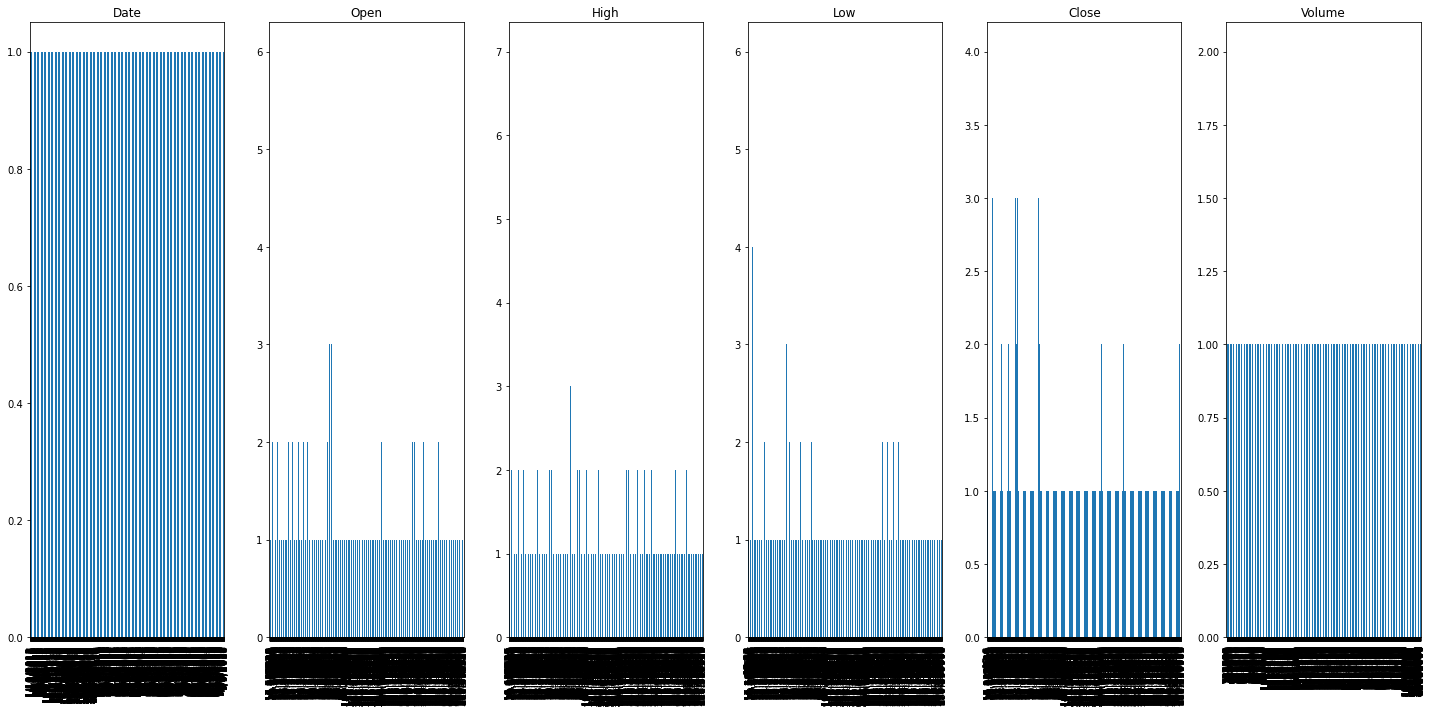

In [20]:
fig, axes = plt.subplots(ncols=len(dataSet.columns), figsize=(20,10))
for col, ax in zip(dataSet, axes):
    dataSet[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.tight_layout()    
plt.show()

In [25]:
#produce a summary of data set
dataSet.describe()

,Open,High,Low,Close,Volume
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07


In [26]:
# set date formate 
dataSet['Date'] = pd.to_datetime(dataSet.Date)

In [27]:
#check data set size 
dataSet.size

10152

In [28]:
#calculate total number of entries and column
dataSet.shape

(1692, 6)

In [29]:
# print the first 30 rows of data set
dataSet.head(20)

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,2680100


In [30]:
#prints information about the DataFrame
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Open    1692 non-null   float64       
 2   High    1692 non-null   float64       
 3   Low     1692 non-null   float64       
 4   Close   1692 non-null   float64       
 5   Volume  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


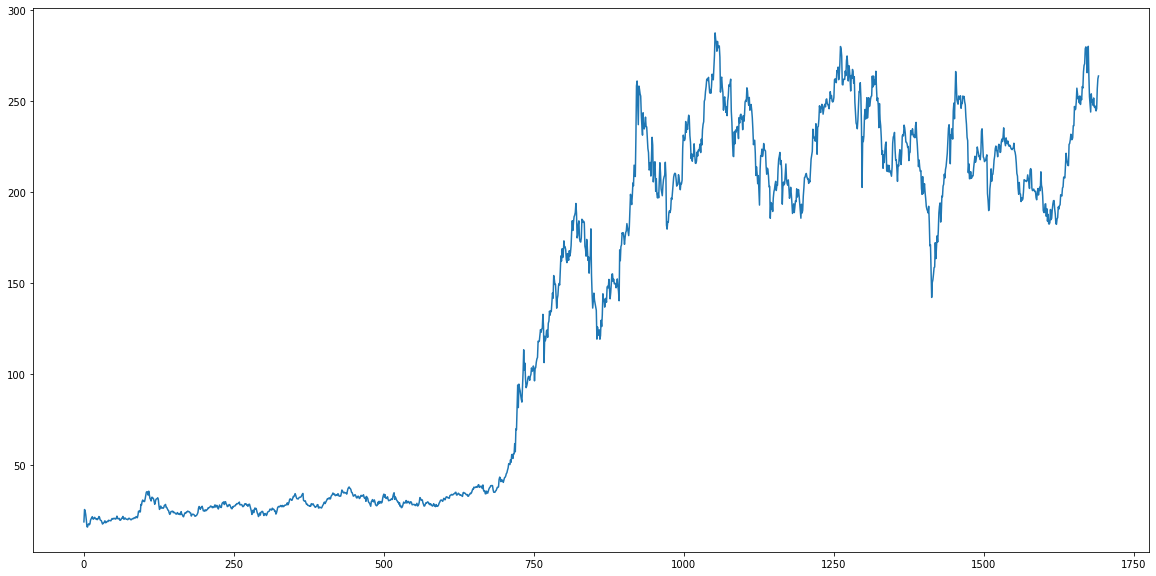

In [31]:
dataSet['Open'].plot(figsize=(20,10))

In [32]:
#create two data set for independant and dependant variabels 
x = dataSet[['Open','High','Low','Volume']]
y = dataSet['Close']

In [33]:
#split data set into  training annd testing  randomly 
X_train, X_test, Y_train, Y_test =  train_test_split(x ,y ,random_state=0)

In [34]:
#get length of training set
len(X_train)

1269

In [35]:
#get length of testing set
len(X_test)

423

In [36]:
#imprt regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
reg = LinearRegression()

In [37]:
#fit the model with data 
reg.fit(X_train, Y_train)

LinearRegression()

In [38]:
#predict the price using the trained model
predict_price = reg.predict(X_test)

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(Y_test, predict_price)

0.999703484441961

In [42]:
predict_price, Y_test

(array([ 31.25357388, 255.654999  , 202.53238354,  16.68989363,
        265.42928013,  34.06133962,  28.00010227,  34.93307051,
         28.22904253, 243.62075478, 203.93297398, 140.71359012,
        200.6293055 , 185.1064507 , 220.68965027, 267.09075276,
         45.08916367,  35.9598045 , 220.30706633, 221.87946873,
         22.88775466, 119.55607168, 205.28565468,  26.88940097,
         34.76771998, 193.16075835,  33.21114752,  19.20423215,
        227.17996184, 219.21889721, 201.25779081, 177.96058666,
        177.08879439,  24.6447809 , 237.45117492,  29.10773585,
         28.02008386,  33.12628952,  32.55665566,  33.79729393,
         20.78717641,  98.81572601, 216.69610021,  31.56811584,
         24.04301139,  25.40905446,  28.7300207 ,  30.69660973,
        190.20464301, 157.36969464,  33.2211424 , 282.1000907 ,
         29.6591842 , 202.11464514,  28.50145567, 121.31505779,
        217.02682616, 236.47705373, 197.21689402,  21.41304625,
        182.25745982,  33.29531692, 155.

In [43]:
print(X_test)

            Open        High         Low   Volume
124    31.260000   32.480000   29.920000  1552600
1688  246.110001  258.119995  246.020004  7575500
1397  198.970001  205.070007  197.250000  5322200
6      16.139999   17.520000   15.570000  7711400
1279  264.269989  267.890015  262.000000  2790100
...          ...         ...         ...      ...
1222  221.000000  237.479996  220.250000  9455900
215    27.200001   27.440001   26.170000  1218500
536    29.690001   31.299999   29.100000   870100
1630  198.080002  202.589996  197.600006  3796900
1548  224.169998  225.110001  222.679993  2065500

[423 rows x 4 columns]


In [44]:
dataFrame = pd.DataFrame(Y_test,predict_price)

In [45]:
dataFrame

,Close
31.253574,NaN
255.654999,NaN
202.532384,NaN
16.689894,NaN
265.429280,NaN
...,...
233.685818,NaN
26.628928,NaN
30.576112,NaN
201.294051,NaN


In [46]:
dframe = pd.DataFrame({'Actual Price':Y_test, 'Predicted Price' : predict_price})

In [47]:
sd=dframe.sort_values(by='Actual Price')

In [48]:
sd['Actual Price']

5        15.800000
4        16.110001
6        17.459999
31       17.600000
9        18.139999
           ...    
1050    269.700012
1674    273.510010
1262    279.720001
1052    281.190002
1051    284.119995
Name: Actual Price, Length: 423, dtype: float64

In [49]:
print(sd) 

      Actual Price  Predicted Price
5        15.800000        15.396379
4        16.110001        16.771326
6        17.459999        16.689894
31       17.600000        17.589502
9        18.139999        18.015058
...            ...              ...
1050    269.700012       270.305547
1674    273.510010       276.911968
1262    279.720001       279.107467
1052    281.190002       282.100091
1051    284.119995       282.007728

[423 rows x 2 columns]


In [50]:
dframe.head(20).sort_values(by='Actual Price')

,Actual Price,Predicted Price
6,17.459999,16.689894
568,28.490000,28.229043
229,28.980000,28.000102
124,30.090000,31.253574
642,34.099998,34.061340
446,35.000000,34.933071
646,36.000000,35.959804
692,43.930000,45.089164
891,139.339996,140.713590
1608,183.770004,185.106451


In [51]:
#get the accuracy score 
reg.score(X_test, Y_test)

0.999703484441961

In [52]:
#get errors of the model
print('Absolute Error:', metrics.mean_absolute_error(Y_test,predict_price))
print('Squared Error:', metrics.mean_squared_error(Y_test,predict_price))
print('Root Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predict_price)))

Absolute Error: 1.0928260736454647
Squared Error: 2.659515984376385
Root Squared Error: 1.6308022517694736


In [53]:
test = Y_test.sort_values

In [54]:
Y_test

124      30.090000
1688    258.000000
1397    204.990005
6        17.459999
1279    263.820007
           ...    
1222    236.800003
215      26.440001
536      31.170000
1630    202.490005
1548    222.929993
Name: Close, Length: 423, dtype: float64

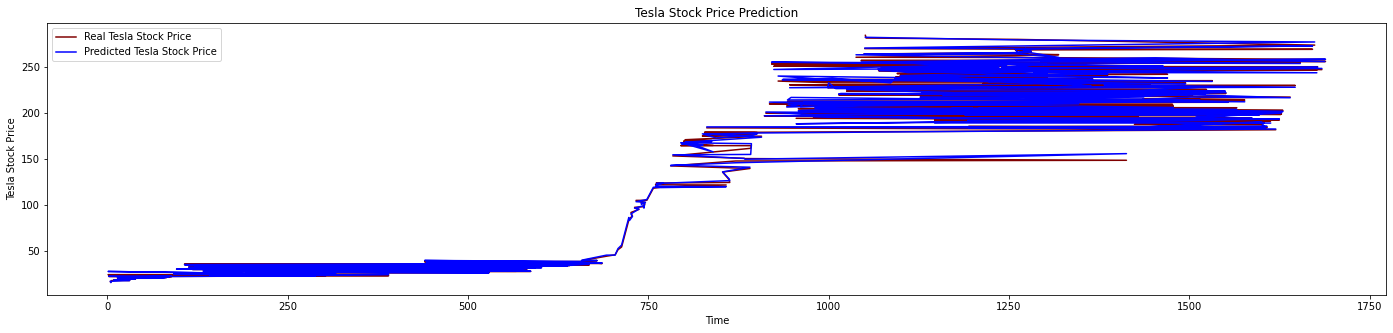

In [55]:
#plot comparision of actual and ppredicted price 
plt.figure(figsize=(24,5))
plt.plot(sd['Actual Price'], color = 'maroon', label = 'Real Tesla Stock Price')
plt.plot(sd['Predicted Price'], color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()